In [5]:
# 第３章の実装
import numpy as np

c = np.array([[1,0,0,0,0,0,0]]) # 入力
W = np.random.randn(7,3) # 重み
h = np.dot(c,W) # 中間ノード
print(h)

[[0.63740423 0.4893231  0.60285527]]


In [6]:
import sys
sys.path.append('deep-learning-from-scratch-2-master/')
from common.layers import MatMul

layer = MatMul(W)
h = layer.forward(c)
print(h)

[[0.63740423 0.4893231  0.60285527]]


In [7]:
# サンプルのコンテキストデータ（ターゲットはsay）
c0 = np.array([[1,0,0,0,0,0,0]]) # you
c1 = np.array([[0,0,1,0,0,0,0]]) # goodbye

# 重みの初期化
W_in = np.random.randn(7,3)
W_out = np.random.randn(3,7)

# レイヤの生成
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 順伝播
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0+h1)
s = out_layer.forward(h)

print(s)

[[-1.57706384  0.27750576  1.83534961 -1.56635935 -1.63439663  0.58098542
  -0.25634691]]


In [8]:
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)

[0 1 2 3 4 1 5 6]


In [9]:
print(id_to_word)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [10]:
# コーパスからコンテキストとターゲットを作成する関数
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size:-window_size]
    contexts = []
    
    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size+1):
            if t == 0:
                continue
            cs.append(corpus[idx+t])
        contexts.append(cs)
        
    return np.array(contexts), np.array(target)

contexts, target = create_contexts_target(corpus, window_size=1)
print(contexts)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]


In [11]:
print(target)

[1 2 3 4 1 5]


In [13]:
from common.util import convert_one_hot

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)
print(target)

[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]


In [34]:
# CBOWモデルの実装
from common.layers import SoftmaxWithLoss

class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        # 重みの初期化
        W_in = 0.01 * np.random.randn(V,H).astype('f')
        W_out = 0.01 * np.random.randn(H,V).astype('f')
        
        # レイヤの生成
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        # 全ての重みと勾配をリストにまとめる
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        # メンバ変数に単語の分散表現を設定
        self.word_vecs = W_in
        
    # 順伝播
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0+h1)*0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
        
    # 逆伝播
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

| epoch 357 |  iter 1 / 2 | time 0[s] | loss 0.74
| epoch 358 |  iter 1 / 2 | time 0[s] | loss 0.82
| epoch 359 |  iter 1 / 2 | time 0[s] | loss 0.87
| epoch 360 |  iter 1 / 2 | time 0[s] | loss 0.88
| epoch 361 |  iter 1 / 2 | time 0[s] | loss 0.82
| epoch 362 |  iter 1 / 2 | time 0[s] | loss 0.69
| epoch 363 |  iter 1 / 2 | time 0[s] | loss 0.90
| epoch 364 |  iter 1 / 2 | time 0[s] | loss 0.69
| epoch 365 |  iter 1 / 2 | time 0[s] | loss 0.84
| epoch 366 |  iter 1 / 2 | time 0[s] | loss 0.86
| epoch 367 |  iter 1 / 2 | time 0[s] | loss 0.77
| epoch 368 |  iter 1 / 2 | time 0[s] | loss 0.87
| epoch 369 |  iter 1 / 2 | time 0[s] | loss 0.74
| epoch 370 |  iter 1 / 2 | time 0[s] | loss 0.78
| epoch 371 |  iter 1 / 2 | time 0[s] | loss 0.85
| epoch 372 |  iter 1 / 2 | time 0[s] | loss 0.80
| epoch 373 |  iter 1 / 2 | time 0[s] | loss 0.74
| epoch 374 |  iter 1 / 2 | time 0[s] | loss 0.79
| epoch 375 |  iter 1 / 2 | time 0[s] | loss 0.85
| epoch 376 |  iter 1 / 2 | time 0[s] | loss 0.77


| epoch 709 |  iter 1 / 2 | time 0[s] | loss 0.46
| epoch 710 |  iter 1 / 2 | time 0[s] | loss 0.67
| epoch 711 |  iter 1 / 2 | time 0[s] | loss 0.46
| epoch 712 |  iter 1 / 2 | time 0[s] | loss 0.71
| epoch 713 |  iter 1 / 2 | time 0[s] | loss 0.65
| epoch 714 |  iter 1 / 2 | time 0[s] | loss 0.53
| epoch 715 |  iter 1 / 2 | time 0[s] | loss 0.58
| epoch 716 |  iter 1 / 2 | time 0[s] | loss 0.60
| epoch 717 |  iter 1 / 2 | time 0[s] | loss 0.47
| epoch 718 |  iter 1 / 2 | time 0[s] | loss 0.53
| epoch 719 |  iter 1 / 2 | time 0[s] | loss 0.89
| epoch 720 |  iter 1 / 2 | time 0[s] | loss 0.53
| epoch 721 |  iter 1 / 2 | time 0[s] | loss 0.59
| epoch 722 |  iter 1 / 2 | time 0[s] | loss 0.51
| epoch 723 |  iter 1 / 2 | time 0[s] | loss 0.61
| epoch 724 |  iter 1 / 2 | time 0[s] | loss 0.56
| epoch 725 |  iter 1 / 2 | time 0[s] | loss 0.48
| epoch 726 |  iter 1 / 2 | time 0[s] | loss 0.72
| epoch 727 |  iter 1 / 2 | time 0[s] | loss 0.56
| epoch 728 |  iter 1 / 2 | time 0[s] | loss 0.59


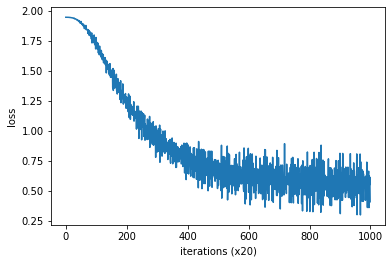

In [35]:
# 学習コードの実装
from common.trainer import Trainer
from common.optimizer import Adam

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
contexts = convert_one_hot(contexts, vocab_size)
target = convert_one_hot(target, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [36]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 1.3014216  1.1757638 -1.0338686 -1.0858527  1.0101876]
say [ 0.01789239 -0.4459873   1.2755833   0.19542563 -1.2927741 ]
goodbye [ 0.68508565  0.6291602  -0.75196415 -0.780388    0.844145  ]
and [ 1.4931409 -1.2936455  1.0338649  1.3334386 -1.0366102]
i [ 0.65901333  0.6180986  -0.7671963  -0.7900415   0.85442805]
hello [ 1.3223665  1.19079   -1.0389283 -1.0999779  1.0111777]
. [-1.260661   1.457318   1.1232117 -1.4298071 -1.1181397]
